In [1]:
import pandas as pd
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neighbors import BallTree
import numpy as np
pd.set_option('display.max_columns', 99)

In [2]:
df = pd.read_csv("ts_centroids_corn.csv", index_col=0)
df.head()

,fips_code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,longitude,latitude
0,1001,23.0,41.0,52.5,48.3,42.0,59.0,45.0,15.0,36.9,44.5,20.8,17.3,59.1,38.0,41.2,56.5,38.5,47.7,20.0,62.5,51.3,90.0,71.7,29.4,80.0,50.0,38.0,75.0,33.0,76.0,31.0,71.0,52.0,120.0,83.0,103.0,66.0,40.0,NaN,NaN,NaN,111.1,NaN,99.3,NaN,NaN,NaN,-86.642743,32.534922
1,1003,28.0,52.0,67.5,68.6,78.0,62.0,100.0,48.0,100.6,98.3,80.1,101.4,94.5,95.2,78.5,80.0,76.5,91.1,60.9,103.3,68.7,93.0,100.8,78.9,112.2,96.0,102.0,99.0,68.0,112.0,58.0,NaN,94.0,120.0,120.0,124.0,89.0,105.0,NaN,124.0,161.9,65.9,123.3,156.0,138.9,147.2,152.9,-87.722570,30.727483
2,1005,27.0,43.0,49.4,41.2,30.0,50.0,53.0,20.0,39.3,45.0,39.5,37.9,65.0,56.8,56.4,63.0,38.2,77.0,29.4,65.4,51.0,85.2,72.1,51.4,80.0,77.0,54.0,88.0,70.0,110.0,NaN,99.0,88.0,115.0,93.0,114.0,75.0,103.0,NaN,109.0,79.4,119.6,NaN,153.8,166.3,181.6,188.9,-85.393209,31.869583
3,1007,26.0,44.0,36.1,43.2,35.0,35.0,44.0,20.0,35.0,NaN,NaN,NaN,NaN,21.7,NaN,58.6,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-87.126475,32.998628
4,1009,29.0,47.0,49.3,47.7,42.0,42.0,53.0,28.0,48.4,54.5,14.7,53.8,68.9,35.7,56.4,91.7,66.7,86.9,54.3,85.0,65.3,96.3,123.9,57.1,95.8,61.0,94.0,94.0,83.0,119.0,53.0,127.0,94.0,128.0,139.0,NaN,NaN,NaN,NaN,110.0,NaN,109.5,70.0,137.1,144.0,128.4,NaN,-86.567379,33.980872


In [3]:
df.tail()

,fips_code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,longitude,latitude
2763,56031,64.0,81.0,94.0,112.4,74.7,96.0,98.0,73.8,69.9,86.8,90.0,110.8,104.0,95.0,90.0,92.3,108.0,97.0,104.0,98.1,111.8,106.0,90.0,80.0,103.0,80.0,102.0,132.0,138.0,135.0,131.0,113.0,126.0,150.0,116.0,135.0,109.0,145.0,NaN,NaN,NaN,143.5,NaN,NaN,152.5,NaN,NaN,-104.965925,42.132960
2764,56033,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,90.0,85.0,NaN,91.0,89.0,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-106.879399,44.790032
2765,56041,NaN,NaN,NaN,77.0,30.0,35.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-110.547628,41.287642
2766,56043,70.0,81.0,76.0,72.0,67.0,64.0,85.0,76.0,69.0,64.0,98.0,112.4,105.4,107.0,111.0,100.0,106.0,95.0,96.3,85.0,110.4,118.5,123.0,95.0,108.0,130.0,128.0,148.0,135.0,NaN,NaN,119.0,153.0,134.0,NaN,135.0,NaN,149.0,155.0,NaN,NaN,132.4,NaN,152.1,NaN,NaN,NaN,-107.682807,43.904963
2767,56045,NaN,52.0,57.0,57.0,30.0,35.0,40.0,30.0,31.0,47.7,35.0,30.0,39.0,99.0,84.0,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-104.567652,43.840410


In [5]:
import seaborn as sns
%matplotlib inline

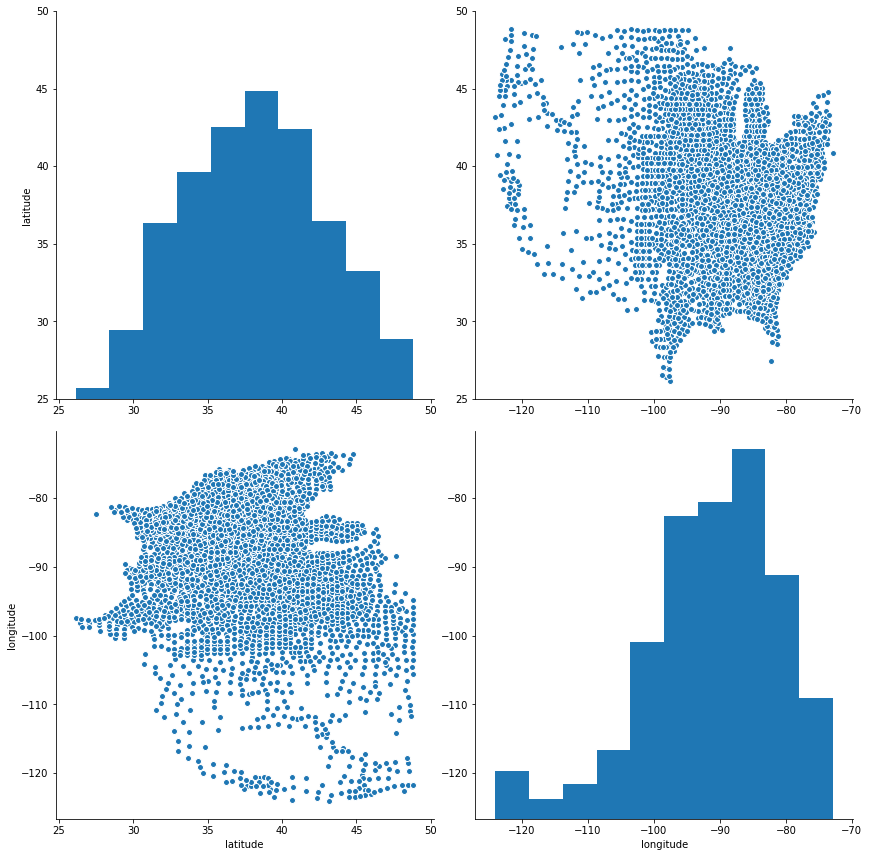

In [9]:
sns.pairplot(df[['latitude', 'longitude']], size=6);

In [23]:
df["lat_long"] = df.apply(lambda x: tuple(df[['latitude']['longitude']]))
df.head()

TypeError: ('list indices must be integers or slices, not str', 'occurred at index fips_code')

In [20]:
# [tuple(x) for x in ]
# np.array(df[['latitude', 'longitude']].to_records(index=False))
df[['latitude', 'longitude']].to_records(index=False)

rec.array([( 32.53492186,  -86.64274303), ( 30.72748333,  -87.72257024),
           ( 31.86958282,  -85.39320852), ...,
           ( 41.28764211, -110.54762783), ( 43.90496348, -107.68280747),
           ( 43.84041011, -104.56765236)], 
          dtype=[('latitude', '<f8'), ('longitude', '<f8')])

In [57]:
RADIANT_TO_KM_CONSTANT = 6367
class BallTreeIndex:
    def __init__(self,lat_longs):
        self.lat_longs = np.radians(lat_longs)
        self.ball_tree_index =BallTree(self.lat_longs, metric='haversine')
        
    def query_radius(self,query,radius):
        radius_km = radius/1e3
        radius_radian = radius_km / RADIANT_TO_KM_CONSTANT 
        query = np.radians(np.array([query]))
        indices = self.ball_tree_index.query_radius(query,r=radius_radian)     
        return indices[0]

In [55]:
b = BallTreeIndex(df[['latitude', 'longitude']].values)

In [58]:
b.query_radius([ 32.10052835, -85.71568177],50000)

array([array([54, 50,  5,  2, 43])], dtype=object)

In [43]:
df[['latitude', 'longitude']].values[5].reshape(1,-1)

array([[ 32.10052835, -85.71568177]])

In [45]:
np.radians(np.array([ 32.10052835, -85.71568177]))

array([ 0.56025991, -1.49602087])

In [40]:
from sklearn.neighbors.ball_tree import BinaryTree

In [ ]:
BinaryTree.query_radius

In [59]:
from sklearn.neighbors import DistanceMetric
RADIANT_TO_KM_CONSTANT = 6367
class BruteForce:
    def __init__(self,lat_longs):
        self.haversine =DistanceMetric.get_metric('haversine')
        self.lat_longs = np.radians(lat_longs)
        
    def query_radius(self,query,radius):
        radius_km = radius/1e3
        radius_radian = radius_km / RADIANT_TO_KM_CONSTANT
        query = np.radians(np.array([query]))
        result=self.haversine.pairwise(self.lat_longs,query)
        result =result[result<radius_radian]
        return result*RADIANT_TO_KM_CONSTANT*1000

In [60]:
brute = BruteForce(df[['latitude', 'longitude']].values)

In [63]:
brute.query_radius([ 32.10052835, -85.71568177],50000)

array([  3.97802027e+04,   2.14468835e-04,   3.17922758e+04,
         4.81532958e+04,   3.93222726e+04])

In [6]:
from sklearn.neighbors import BallTree

In [10]:
X = df[['latitude', 'longitude']]

In [11]:
tree = BallTree(X)

In [17]:
dist, ind = tree.query([X.loc[0]], k=3)
dist, ind

(array([[ 0.        ,  0.32205151,  0.38024512]]), array([[ 0, 10, 42]]))

In [23]:
tree.kernel_density(X[:3], h=0.1, kernel='gaussian')

array([ 16.01619916,  15.93633079,  15.94577399])

In [22]:
tree2 = BallTree(X, leaf_size=2)
print(tree2.query_radius(X.loc[0], r=0.3, count_only=True))
ind2 = tree2.query_radius(X.loc[0], r=0.3)  
ind2

ValueError: Expected 2D array, got 1D array instead:
array=[ 32.53492186 -86.64274303].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [6]:
rbf_df = pd.DataFrame(rbf_kernel(df[['latitude', 'longitude']]))

rbf_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767
0,1.000000,0.108997,0.367142,0.798908,0.350559,0.592106,0.735749,0.333542,0.425656,0.151656,0.949463,0.235605,0.341625,0.562511,0.277774,0.425170,0.048795,0.510253,0.853357,0.429222,0.685989,0.272392,0.319604,0.878666,0.110335,0.883629,0.324025,0.265701,0.271337,0.078939,0.256778,0.403337,0.599039,0.222621,0.156807,0.065485,0.575927,0.160188,0.036463,0.111150,0.435732,0.070966,0.930258,0.629751,0.083189,0.497168,0.127853,0.176461,0.064002,...,3.497816e-35,3.407719e-40,4.226611e-32,1.173508e-26,1.755581e-38,3.214031e-40,2.597908e-44,1.829899e-33,2.974503e-41,8.231375e-24,2.327384e-29,2.560134e-24,1.820906e-41,5.561315e-42,7.365484e-29,8.460151e-44,2.590552e-34,2.880113e-28,7.447066e-39,1.241487e-35,4.241461e-31,3.374454e-42,8.280940e-24,2.888000e-45,9.263009e-27,3.435205e-25,7.849698e-33,2.643988e-31,1.746352e-30,4.321922e-34,7.591312e-98,5.886064e-131,3.934656e-108,2.539018e-108,1.171221e-101,4.605526e-102,1.127071e-129,1.180160e-88,4.439714e-131,8.084801e-116,3.716134e-88,1.491127e-112,8.086758e-94,2.991188e-146,1.233375e-93,2.887494e-122,1.892093e-141,6.309508e-125,2.989540e-98
1,0.108997,1.000000,0.034557,0.063500,0.002581,0.052004,0.343556,0.001610,0.006055,0.000277,0.063814,0.374886,0.633597,0.006990,0.001147,0.176926,0.000372,0.599372,0.029393,0.389137,0.223870,0.002111,0.083962,0.230531,0.000150,0.050555,0.789135,0.000980,0.011318,0.001003,0.158610,0.101713,0.125513,0.033779,0.048847,0.000062,0.013080,0.008858,0.000164,0.000687,0.010495,0.000183,0.203185,0.032208,0.000146,0.314202,0.002954,0.000488,0.888214,...,3.458068e-45,3.816250e-50,1.554908e-41,1.600515e-35,2.176247e-46,4.902343e-48,1.058227e-52,1.849852e-42,8.631100e-51,3.995579e-32,4.683734e-37,4.247281e-32,1.761898e-50,4.965382e-50,8.038507e-37,3.986808e-53,6.716979e-44,2.122950e-37,5.864178e-48,1.272386e-43,8.909017e-39,2.001884e-52,7.792769e-32,2.642438e-54,1.757762e-35,1.329552e-33,4.490252e-42,3.895965e-40,1.461024e-39,8.127512e-43,5.099186e-97,2.556268e-131,2.012626e-109,5.842073e-107,5.751944e-102,4.428975e-104,1.426575e-128,8.246296e-89,1.345415e-130,1.849367e-116,1.531321e-87,3.008444e-112,1.119612e-94,7.340158e-146,1.539305e-93,2.335621e-123,4.511542e-138,6.017128e-125,1.108607e-99
2,0.367142,0.034557,1.000000,0.117716,0.054036,0.924352,0.433803,0.149243,0.579398,0.068442,0.257403,0.016089,0.050310,0.336743,0.194607,0.751266,0.000993,0.252158,0.393010,0.471128,0.648518,0.026095,0.887328,0.207677,0.032096,0.576926,0.158830,0.076339,0.011501,0.001817,0.670755,0.023332,0.055106,0.928217,0.770498,0.012066,0.078153,0.004176,0.000784,0.004721,0.764675,0.003756,0.435812,0.836812,0.007785,0.052725,0.003416,0.029141,0.010661,...,4.136320e-40,5.360695e-46,5.873234e-37,6.159462e-31,2.629763e-45,2.598024e-47,1.252000e-51,6.691913e-39,1.666618e-47,5.749988e-28,5.550231e-35,5.322725e-29,4.458656e-48,3.510963e-49,3.097847e-34,1.560074e-50,1.929404e-39,1.216331e-32,4.786092e-45,5.000554e-42,5.274195e-37,4.250041e-48,3.343201e-28,2.343529e-52,3.463029e-31,1.478472e-29,5.633456e-38,1.700278e-36,2.442444e-35,8.159121e-40,2.853589e-111,1.915682e-146,3.279343e-122,2.057271e-122,2.401429e-115,1.039250e-115,4.458303e-145,1.842847e-101,1.414948e-146,2.121371e-130,6.411014e-101,6.131252e-127,5.691345e-107,1.335080e-162,8.693213e-107,3.180236e-137,2.189194e-157,4.588754e-140,1.112872e-111
3,0.798908,0.063500,0.117716,1.000000,0.527980,0.246977,0.416419,0.318482,0.221418,0.156878,0.909860,0.324611,0.325686,0.432659,0.218558,0.146392,0.186694,0.289292,0.678337,0.172142,0.322011,0.508792,0.092941,0.797372,0.143440,0.572142,0.173127,0.318657,0.638534,0.272955,0.071327,0.703632,0.857119,0.056262,0.034517

In [9]:
rbf_df.columns

RangeIndex(start=0, stop=2768, step=1)

In [13]:
rbf_df.loc[0].sum()

35.824985605603132

In [18]:
cols = df.columns.tolist()
cols_tokeep = [c for c in cols if c.startswith('1') or c.startswith('2')]

In [19]:
df[cols_tokeep]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,23.0,41.0,52.5,48.3,42.0,59.0,45.0,15.0,36.9,44.5,20.8,17.3,59.1,38.0,41.2,56.5,38.5,47.7,20.0,62.5,51.3,90.0,71.7,29.4,80.0,50.0,38.0,75.0,33.0,76.0,31.0,71.0,52.0,120.0,83.0,103.0,66.0,40.0,NaN,NaN,NaN,111.1,NaN,99.3,NaN,NaN,NaN
1,28.0,52.0,67.5,68.6,78.0,62.0,100.0,48.0,100.6,98.3,80.1,101.4,94.5,95.2,78.5,80.0,76.5,91.1,60.9,103.3,68.7,93.0,100.8,78.9,112.2,96.0,102.0,99.0,68.0,112.0,58.0,NaN,94.0,120.0,120.0,124.0,89.0,105.0,NaN,124.0,161.9,65.9,123.3,156.0,138.9,147.2,152.9
2,27.0,43.0,49.4,41.2,30.0,50.0,53.0,20.0,39.3,45.0,39.5,37.9,65.0,56.8,56.4,63.0,38.2,77.0,29.4,65.4,51.0,85.2,72.1,51.4,80.0,77.0,54.0,88.0,70.0,110.0,NaN,99.0,88.0,115.0,93.0,114.0,75.0,103.0,NaN,109.0,79.4,119.6,NaN,153.8,166.3,181.6,188.9
3,26.0,44.0,36.1,43.2,35.0,35.0,44.0,20.0,35.0,NaN,NaN,NaN,NaN,21.7,NaN,58.6,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.0,47.0,49.3,47.7,42.0,42.0,53.0,28.0,48.4,54.5,14.7,53.8,68.9,35.7,56.4,91.7,66.7,86.9,54.3,85.0,65.3,96.3,123.9,57.1,95.8,61.0,94.0,94.0,83.0,119.0,53.0,127.0,94.0,128.0,139.0,NaN,NaN,NaN,NaN,110.0,NaN,109.5,70.0,137.1,144.0,128.4,NaN
5,23.0,39.0,39.2,39.7,37.0,37.0,51.0,30.0,36.0,36.9,22.0,22.1,47.8,67.5,54.0,66.7,39.0,50.0,24.0,60.0,52.0,75.0,80.0,41.0,85.5,NaN,NaN,60.0,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.0,128.0,NaN,NaN,NaN
6,21.0,36.0,41.5,38.1,36.0,38.0,37.0,22.0,31.9,48.9,29.0,50.5,56.6,44.2,53.8,51.8,73.3,74.1,45.0,73.5,63.9,87.5,83.8,62.8,85.4,88.0,68.0,77.0,31.0,85.0,17.0,66.0,40.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,61.2,NaN,122.2,NaN,102.8,NaN,NaN
7,26.0,51.0,52.0,50.9,41.0,43.0,50.0,30.0,50.6,67.7,14.7,46.6,46.7,25.6,64.1,75.8,59.4,90.0,54.5,106.3,76.9,84.4,118.4,64.0,118.6,58.0,91.0,90.0,84.0,NaN,NaN,NaN,96.0,117.0,144.0,NaN,61.0,90.0,NaN,103.0,118.3,119.6,98.7,117.4,136.2,NaN,NaN
8,22.0,38.0,45.6,50.7,36.0,43.0,35.0,20.0,33.5,51.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30.0,52.0,55.5,53.7,42.0,55.0,63.0,25.0,44.2,74.4,16.6,65.5,50.0,40.8,64.4,92.7,47.7,71.0,32.7,73.3,42.9,65.5,101.6,56.1,113.6,52.0,80.0,73.0,65.0,107.0,47.0,119.0,78.0,132.0,143.0,135.0,68.0,35.0,NaN,83.0,65.2,114.5,80.9,121.9,113.2,98.0,92.3


In [24]:
counties = np.array(df[cols_tokeep])

In [25]:
kern = np.array(rbf_df)

In [94]:
counties

array([[  23. ,   41. ,   52.5, ...,    nan,    nan,    nan],
       [  28. ,   52. ,   67.5, ...,  138.9,  147.2,  152.9],
       [  27. ,   43. ,   49.4, ...,  166.3,  181.6,  188.9],
       ..., 
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [  70. ,   81. ,   76. , ...,    nan,    nan,    nan],
       [   nan,   52. ,   57. , ...,    nan,    nan,    nan]])

In [89]:
kern_norm = np.array([col/col.sum() for col in kern])
kern_norm.shape

(2768, 2768)

In [92]:
kern.dot(counties)

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [103]:
counties_fill = df[cols_tokeep].copy()

In [105]:
counties_fill.fillna(0, inplace=True)
counties_fill.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,23.0,41.0,52.5,48.3,42.0,59.0,45.0,15.0,36.9,44.5,20.8,17.3,59.1,38.0,41.2,56.5,38.5,47.7,20.0,62.5,51.3,90.0,71.7,29.4,80.0,50.0,38.0,75.0,33.0,76.0,31.0,71.0,52.0,120.0,83.0,103.0,66.0,40.0,0.0,0.0,0.0,111.1,0.0,99.3,0.0,0.0,0.0
1,28.0,52.0,67.5,68.6,78.0,62.0,100.0,48.0,100.6,98.3,80.1,101.4,94.5,95.2,78.5,80.0,76.5,91.1,60.9,103.3,68.7,93.0,100.8,78.9,112.2,96.0,102.0,99.0,68.0,112.0,58.0,0.0,94.0,120.0,120.0,124.0,89.0,105.0,0.0,124.0,161.9,65.9,123.3,156.0,138.9,147.2,152.9
2,27.0,43.0,49.4,41.2,30.0,50.0,53.0,20.0,39.3,45.0,39.5,37.9,65.0,56.8,56.4,63.0,38.2,77.0,29.4,65.4,51.0,85.2,72.1,51.4,80.0,77.0,54.0,88.0,70.0,110.0,0.0,99.0,88.0,115.0,93.0,114.0,75.0,103.0,0.0,109.0,79.4,119.6,0.0,153.8,166.3,181.6,188.9
3,26.0,44.0,36.1,43.2,35.0,35.0,44.0,20.0,35.0,0.0,0.0,0.0,0.0,21.7,0.0,58.6,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,47.0,49.3,47.7,42.0,42.0,53.0,28.0,48.4,54.5,14.7,53.8,68.9,35.7,56.4,91.7,66.7,86.9,54.3,85.0,65.3,96.3,123.9,57.1,95.8,61.0,94.0,94.0,83.0,119.0,53.0,127.0,94.0,128.0,139.0,0.0,0.0,0.0,0.0,110.0,0.0,109.5,70.0,137.1,144.0,128.4,0.0


In [107]:
rbf_df.dot(counties_fill)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,911.194889,1487.510351,1595.454029,1603.520157,1473.825711,1691.869100,1792.867983,785.791712,1407.938200,1731.003334,947.998544,1403.168156,1902.178348,1630.219883,1830.328570,2260.105854,1715.302974,2150.081398,1319.070291,2112.735938,1573.293637,2093.009745,2294.672148,1359.344329,2385.522135,1509.337057,1745.759136,2162.039538,1315.755871,2120.348086,934.591887,1451.065282,2020.412529,2488.548310,1729.075835,1474.953241,1043.462439,1189.970055,392.686923,1273.207457,1398.675691,1417.103965,1959.087991,2351.254623,2007.985072,1500.734699,1771.356766
1,487.651383,902.009629,924.190387,916.302197,871.508130,954.246296,1169.554690,593.698891,1115.436128,1121.328802,761.211408,1178.043799,1194.097266,1136.631714,1159.510942,1150.667969,1174.099853,1354.061890,816.487967,1341.698247,974.092042,1086.181767,1386.446231,934.869755,1475.622824,1030.830477,1240.582291,1207.470643,662.369308,1170.082950,557.598785,597.140647,981.233331,1269.332037,916.644984,797.172801,565.795088,740.997040,270.165770,798.709521,760.512912,390.260245,678.160870,971.317667,703.499987,513.342980,686.413333
2,1306.939675,2210.993452,2149.136291,1994.413857,2094.001888,2278.873371,2559.776760,1043.746636,1991.351890,2494.622917,1716.366351,2123.052929,2967.368290,2701.133533,2819.298092,3284.076452,2254.282845,3095.575103,2194.326235,3386.434008,2635.849482,3440.655285,3383.556218,2224.669717,3409.589760,2527.692223,2714.113168,3363.221767,2325.801444,3161.756131,2146.991836,3061.193007,3205.545795,3606.547020,3215.513899,3292.708141,2604.838133,2603.655557,1892.901655,2170.160233,2165.389413,2020.949528,3396.828848,3639.970239,2660.650118,2539.852260,2583.205333
3,898.019608,1407.985645,1553.751418,1601.808180,1441.149832,1662.509135,1757.022008,835.245764,1408.098973,1689.547883,842.468796,1405.427753,1889.495677,1517.097882,1827.517840,2294.837891,1824.032106,2139.250289,1328.502329,2039.649374,1474.592155,1955.823510,2350.107095,1384.848324,2414.939103,1619.243625,1851.936909,2065.807450,1311.154533,2074.219752,1048.793164,1566.250547,2008.363631,2479.993501,1833.449867,1548.446899,1012.953867,1226.333475,428.967763,1380.472250,1539.375523,1595.319694,1941.200986,2392.726553,2451.804512,1592.205042,1809.094602
4,1241.513398,1871.058864,2083.912517,2137.475381,1937.805787,2177.134598,2468.498849,1272.516784,1876.939422,2390.175655,1080.216846,2005.289955,2598.088337,1790.721399,2614.773848,3195.265965,2245.304103,2622.439145,1657.074817,2718.743607,2106.858278,2651.694224,3350.996062,1899.122188,3163.230331,2383.285122,2595.283549,2545.319346,2081.687106,2778.359570,1934.855124,2624.811742,2656.088734,3309.011723,3180.975035,2923.000980,1874.890116,1911.937200,1127.208528,2514.544263,2379.805044,2709.858214,2290.957467,3291.385617,3626.403612,2609.032407,2514.048553
5,1197.784484,2000.968329,1993.830654,1888.167062,1905.672892,2106.525441,2318.210988,961.287595,1783.517144,2246.934487,1458.384276,1872.402752,2606.200551,2341.549748,2470.812736,2946.643826,2034.656173,2776.930521,1874.858856,2957.643975,2274.893785,2990.977933,2974.547498,1885.099264,3008.607027,2095.166819,2291.225108,2916.322178,1922.916099,2764.766635,1602.464549,2395.394443,2738.107547,3127.456426,2604.828530,2597.547813,1995.363149,2033.206440,1260.485817,1808.522686,1804.665095,1764.514122,2783.459727,3113.933929,2253.923843,2116.897984,2284.381428
6,796.970900,1384.463360,1447.630064,1394.663197,1300.111661,1496.578942,1674.648560,754.457463,1411.066679,1649.795123,1063.241838,1483.821920,1794.040056,1676.812126,1759.907088,1988.103013,1611.374929,2046.860909,1271.565810,2110.527211,1655.176086,2082.339550,2256.080943,1442.780077,2381.268071,1615.419238,1825.198310,2224.741644,1317.767019,2212.883055,998.231697,1406.214722,2016.317068,2494.388828

In [109]:
pd.DataFrame(kern_norm).dot(counties_fill)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,25.434620,41.521590,44.534673,44.759827,41.139604,47.225953,50.045184,21.934181,39.300454,48.318326,26.461938,39.167306,53.096416,45.505109,51.090839,63.087418,47.880074,60.016253,36.819841,58.973811,43.916100,58.423185,64.052284,37.944030,66.588223,42.130849,48.730212,60.350046,36.727324,59.186293,26.087711,40.504281,56.396744,69.464042,48.264523,41.171077,29.126667,33.216205,10.961258,35.539650,39.041905,39.556302,54.684962,65.631698,56.049850,41.890727,49.444731
1,25.071230,46.374298,47.514660,47.109110,44.806149,49.059900,60.129378,30.523365,57.347024,57.649979,39.135552,60.565822,61.391166,58.436735,59.613007,59.158370,60.363055,69.615299,41.977441,68.979657,50.080213,55.842993,71.280249,48.063709,75.865013,52.997261,63.781063,62.078720,34.053862,60.156537,28.667379,30.700313,50.447363,65.259151,47.126734,40.984406,29.088769,38.096287,13.889816,41.063412,39.099641,20.064137,34.865741,49.937577,36.168481,26.392091,35.290019
2,27.821338,47.066286,45.749508,42.455871,44.575841,48.511273,54.490973,22.218645,42.390690,53.104018,36.536965,45.194262,63.167534,57.500091,60.015506,69.909425,47.987804,65.896723,46.711485,72.088351,56.110363,73.242581,72.027090,47.357418,72.581277,53.807977,57.776393,71.594223,49.510249,67.305545,45.703859,65.164818,68.237713,76.773983,68.449907,70.093172,55.450213,55.425039,40.294941,46.197053,46.095495,43.020746,72.309630,77.485476,56.638304,54.066833,54.989707
3,25.695338,40.287168,44.458013,45.833078,41.236106,47.569934,50.274263,23.899169,40.290411,48.343603,24.105844,40.213978,54.064777,43.409233,52.291384,65.662970,52.191646,61.211090,38.012885,58.361175,42.193003,55.962638,67.244407,39.625132,69.099467,46.331964,52.990095,59.109645,37.516507,59.350349,30.009472,44.815655,57.465986,70.960890,52.461119,44.306233,28.983991,35.089493,12.274199,39.499918,44.046671,45.647420,55.544238,68.463892,70.154309,45.558300,51.764234
4,29.887227,45.042415,50.166488,51.455919,46.649228,52.410644,59.424720,30.633579,45.183979,57.539228,26.004300,48.273789,62.544356,43.108433,62.946030,76.920346,54.051703,63.130559,39.891129,65.448917,50.718866,63.834823,80.669271,45.717989,76.149145,57.373351,62.476836,61.274037,50.112915,66.884066,46.578196,63.187675,63.940613,79.658572,76.576317,70.366050,45.134645,46.026488,27.135541,60.533181,57.289574,65.235017,55.150727,79.234255,87.299218,62.807815,60.521248
5,27.139323,45.337811,45.176086,42.781967,43.178613,47.729517,52.525875,21.780792,40.410816,50.910896,33.043977,42.424781,59.051124,53.054683,55.983515,66.764865,46.101108,62.919512,42.480431,67.014106,51.544396,67.769385,67.397105,42.712457,68.168824,47.472154,51.914430,66.077839,43.569309,62.643904,36.308538,54.274692,62.039864,70.861706,59.020037,58.855070,45.210809,46.068260,28.560006,40.977390,40.889985,39.980247,63.067451,70.555314,51.069261,47.964538,51.759367
6,25.135780,43.664790,45.657014,43.986484,41.004409,47.200819,52.816983,23.794943,44.503836,52.033127,33.533738,46.798474,56.582488,52.885220,55.505964,62.703068,50.821387,64.556242,40.104098,66.564222,52.202838,65.675208,71.154863,45.504049,75.103158,50.948941,57.565193,70.166448,41.561244,69.792438,31.483374,44.350809,63.592915,78.670889,55.127105,49.142400,37.511547,41.223777,17.531583,41.799320,42.270904,35.596645,56.388605,65.408767,52.225698,40.881274,52.704720
7,30.231071,46.035469,49.130937,50.410467,47.961434,52.270849,57.422505,26.783224,41.607429,55.141260,25.981981,44.791281,61.013402,43.211384,61.461913,73.222322,47.566989,57.696027,37.828683,60.801871,48.902440,62.154800,70.342602,37.918641,64.805031,46.464911,49.900037,51.565996,40.705147,53.523397,34.650502,45.974509,49.969449,59.617773,58.390651,55.161171,35.300329,34.510740,20.474879,43.421949,39.911053,46.955976,45.550687,61.956230,63.342356,46.85767

In [26]:
three = kern[:3, :3]
three

array([[ 1.        ,  0.10899749,  0.36714212],
       [ 0.10899749,  1.        ,  0.03455653],
       [ 0.36714212,  0.03455653,  1.        ]])

In [58]:
from sklearn.preprocessing import normalize

In [80]:
t3 = np.array([col/col.sum() for col in three])
t3

array([[ 0.6774427 ,  0.07383955,  0.24871775],
       [ 0.09531468,  0.87446678,  0.03021854],
       [ 0.26192657,  0.02465333,  0.71342011]])

In [81]:
years = counties[:3,:3]
years

array([[ 23. ,  41. ,  52.5],
       [ 28. ,  52. ,  67.5],
       [ 27. ,  43. ,  49.4]])

In [82]:
three.dot(years)

array([[ 35.96476688,  62.45498052,  77.99415116],
       [ 31.43996869,  57.95482805,  74.92946101],
       [ 36.41185165,  59.84976658,  71.0075272 ]])

In [84]:
years.dot(three)

array([[ 46.74385824,  45.32116031,  62.36108659],
       [ 58.44996239,  57.38449577,  79.57691905],
       [ 49.82371266,  47.65002501,  60.79876813]])

In [85]:
t3.dot(years)

array([[ 24.36406876,  42.30967059,  52.83656829],
       [ 27.49320804,  50.67957161,  65.52332416],
       [ 25.97694705,  42.6980268 ,  50.65819757]])

In [86]:
three*years

array([[ 23.        ,   4.46889709,  19.27496115],
       [  3.05192972,  52.        ,   2.33256605],
       [  9.91283716,   1.48593097,  49.4       ]])

In [87]:
years*three

array([[ 23.        ,   4.46889709,  19.27496115],
       [  3.05192972,  52.        ,   2.33256605],
       [  9.91283716,   1.48593097,  49.4       ]])

In [31]:
df.loc[2767, '1970'] = 0

In [32]:
full_df = df[['fips_code', '1970','latitude', 'longitude']].dropna()

full_df.shape

(2392, 4)

In [33]:
rbf_df = pd.DataFrame(rbf_kernel(full_df[['latitude', 'longitude']]))
rbf_df[2391].tail()

2387    0.056467
2388    0.000003
2389    0.215024
2390    0.007796
2391    1.000000
Name: 2391, dtype: float64

In [34]:
full_df['1970'].tail()

2760    60.0
2762    64.0
2763    64.0
2766    70.0
2767     0.0
Name: 1970, dtype: float64

In [35]:
full_df.tail()

,fips_code,1970,latitude,longitude
2760,56025,60.0,42.962064,-106.798504
2762,56029,64.0,44.520574,-109.588497
2763,56031,64.0,42.132960,-104.965925
2766,56043,70.0,43.904963,-107.682807
2767,56045,0.0,43.840410,-104.567652


In [38]:
norml = rbf_df[2391].values.sum()
norml

5.3225241331060849

In [37]:
test_2767 = pd.DataFrame({"fips_code": full_df['fips_code'].values, "1970": full_df['1970'].values, "2767": rbf_df[2391].values})#/norml})
test_2767

,1970,2767,fips_code
0,23.0,2.989540e-98,1001
1,28.0,1.108607e-99,1003
2,27.0,1.112872e-111,1005
3,26.0,2.633670e-92,1007
4,29.0,3.413208e-92,1009
5,23.0,7.912000e-108,1011
6,21.0,6.203466e-102,1013
7,26.0,5.152801e-99,1015
8,22.0,1.702885e-106,1017
9,30.0,4.224105e-99,1019


In [22]:
test_2767['2767'].sum()

1.2313463081307123

In [25]:
# 1/norml, 2.313463e-01
1.803513e-03


0.001803513

In [23]:
(test_2767['1970'] * test_2767['2767']).sum()

63.616573164741688

In [175]:
1.025267e-01

0.1025267

In [24]:
a_test[0].mean()

NameError: name 'a_test' is not defined

In [60]:
al_1970.dot(al).mean()

51.61443291339949

In [62]:
al_dist = dist.pairwise(np.array(al_df))
al_dist

array([[ 0.        ,  1.99613452,  1.02605663,  0.46237105,  1.44490284],
       [ 1.99613452,  0.        ,  2.42784586,  2.26907282,  2.2240375 ],
       [ 1.02605663,  2.42784586,  0.        ,  1.11524804,  1.62296067],
       [ 0.46237105,  2.26907282,  1.11524804,  0.        ,  0.98406968],
       [ 1.44490284,  2.2240375 ,  1.62296067,  0.98406968,  0.        ]])

In [51]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp

In [48]:
full_df = df[['latitude', 'longitude']].copy()

In [50]:
pairwise_dists = squareform(pdist(full_df, 'euclidean'))

pairwise_dists

array([[  0.        ,   2.10543602,   1.4156315 , ...,  25.45689748,
         23.91573034,  21.19236747],
       [  2.10543602,   0.        ,   2.5942855 , ...,  25.14955681,
         23.91771421,  21.34726306],
       [  1.4156315 ,   2.5942855 ,   0.        , ...,  26.85972174,
         25.3313365 ,  22.60442441],
       ..., 
       [ 25.45689748,  25.14955681,  26.85972174, ...,   0.        ,
          3.88040808,   6.50205591],
       [ 23.91573034,  23.91771421,  25.3313365 , ...,   3.88040808,
          0.        ,   3.11582388],
       [ 21.19236747,  21.34726306,  22.60442441, ...,   6.50205591,
          3.11582388,   0.        ]])

In [52]:
K = exp(-pairwise_dists ** 2 / s ** 2)
K

NameError: name 's' is not defined

In [64]:
from sklearn.preprocessing import normalize

In [67]:
al_dist.sum(axis=1)

array([ 4.92946504,  8.91709071,  6.1921112 ,  4.83076158,  6.27597069])

In [65]:
normalize(al_dist)

array([[ 0.        ,  0.73684309,  0.3787534 ,  0.17067733,  0.53336419],
       [ 0.4466394 ,  0.        ,  0.54323575,  0.50770994,  0.49763319],
       [ 0.31185825,  0.73791615,  0.        ,  0.33896696,  0.49328044],
       [ 0.16800003,  0.82445538,  0.40521936,  0.        ,  0.35755641],
       [ 0.44303664,  0.68193521,  0.4976328 ,  0.30173581,  0.        ]])

In [63]:
al_1970.dot(al_dist)

array([ 137.51912536,  234.95591323,  167.64129515,  132.81829072,
        164.91156503])

In [35]:
wy_df = df[-5:][['latitude', 'longitude']]
al_df = df[:5][['latitude', 'longitude']]

test_df = al_df.append(wy_df)
test_df

,latitude,longitude
0,32.534922,-86.642743
1,30.727483,-87.722570
2,31.869583,-85.393209
3,32.998628,-87.126475
4,33.980872,-86.567379
2763,42.132960,-104.965925
2764,44.790032,-106.879399
2765,41.287642,-110.547628
2766,43.904963,-107.682807
2767,43.840410,-104.567652


In [80]:
pd.DataFrame(rbf_kernel(test_df))

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,1.089975e-01,3.671421e-01,7.989075e-01,3.505593e-01,1.233375e-93,2.887494e-122,1.892093e-141,6.309508e-125,2.989540e-98
1,1.089975e-01,1.000000e+00,3.455653e-02,6.350011e-02,2.581197e-03,1.539305e-93,2.335621e-123,4.511542e-138,6.017128e-125,1.108607e-99
2,3.671421e-01,3.455653e-02,1.000000e+00,1.177163e-01,5.403581e-02,8.693213e-107,3.180236e-137,2.189194e-157,4.588754e-140,1.112872e-111
3,7.989075e-01,6.350011e-02,1.177163e-01,1.000000e+00,5.279805e-01,5.968529e-88,1.208856e-115,9.206543e-135,2.584587e-118,2.633670e-92
4,3.505593e-01,2.581197e-03,5.403581e-02,5.279805e-01,1.000000e+00,1.157161e-88,1.093320e-115,3.433342e-137,6.253614e-119,3.413208e-92
5,1.233375e-93,1.539305e-93,8.693213e-107,5.968529e-88,1.157161e-88,1.000000e+00,4.697574e-03,1.200946e-07,5.191542e-03,2.150244e-01
6,2.887494e-122,2.335621e-123,3.180236e-137,1.208856e-115,1.093320e-115,4.697574e-03,1.000000e+00,2.596575e-06,4.894831e-01,4.402586e-02
7,1.892093e-141,4.511542e-138,2.189194e-157,9.206543e-135,3.433342e-137,1.200946e-07,2.596575e-06,1.000000e+00,5.373916e-04,6.602745e-10
8,6.309508e-125,6.017128e-125,4.588754e-140,2.584587e-118,6.253614e-119,5.191542e-03,4.894831e-01,5.373916e-04,1.000000e+00,7.795729e-03
9,2.989540e-98,1.108607e-99,1.112872e-111,2.633670e-92,3.413208e-92,2.150244e-01,4.402586e-02,6.602745e-10,7.795729e-03,1.000000e+00


In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr = LinearRegression()

In [88]:
lr.fit(al_1970, al_1975, rbf_kernel(al_df)[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
lr.predict(al_1976)

ValueError: Expected 2D array, got 1D array instead:
array=[  45.  100.   53.   44.   53.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [81]:
rbf_kernel(al_df)

array([[ 1.        ,  0.10899749,  0.36714212,  0.79890752,  0.35055926],
       [ 0.10899749,  1.        ,  0.03455653,  0.06350011,  0.0025812 ],
       [ 0.36714212,  0.03455653,  1.        ,  0.11771625,  0.05403581],
       [ 0.79890752,  0.06350011,  0.11771625,  1.        ,  0.52798048],
       [ 0.35055926,  0.0025812 ,  0.05403581,  0.52798048,  1.        ]])

In [87]:
rbf_kernel(al_df)[0]

array([ 1.        ,  0.10899749,  0.36714212,  0.79890752,  0.35055926])

In [83]:
al_1970 = np.array(df[:5][['1970', '1971', '1972','1973', '1974']])

al_1970

In [85]:
al_1975 = np.array(df[:5]['1975'])
al_1975

array([ 59.,  62.,  50.,  35.,  42.])

In [89]:
al_1976 = np.array(df[:5]['1976'])
al_1976

array([  45.,  100.,   53.,   44.,   53.])

In [ ]:
wy_df = df[-5:][['latitude', 'longitude']]
al_df = df[:5][['latitude', 'longitude']]

In [40]:
4.697574e-03

0.004697574

In [34]:
from math import pi
from sklearn.neighbors import DistanceMetric

In [40]:
dist = DistanceMetric.get_metric("haversine")

In [44]:
full_df = df[['latitude', 'longitude']].copy()

full_df.latitude = full_df.latitude.apply(lambda x : x*pi/180)
full_df.longitude = full_df.longitude.apply(lambda x : x*pi/180)

full_df.head()

,latitude,longitude
0,0.567842,-1.512201
1,0.536296,-1.531048
2,0.556229,-1.490393
3,0.575935,-1.520644
4,0.593078,-1.510886


In [48]:
full_dist = pd.DataFrame(dist.pairwise(full_df))

In [49]:
full_dist.shape

(2768, 2768)

In [50]:
full_dist.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767
2763,0.303479,0.312394,0.325135,0.292887,0.289237,0.318889,0.311776,0.300147,0.313996,0.298862,0.299212,0.291081,0.299852,0.304810,0.304777,0.323560,0.267426,0.311990,0.303737,0.320127,0.316153,0.284168,0.327507,0.300497,0.293738,0.308502,0.313694,0.294952,0.278128,0.269526,0.328758,0.285050,0.289714,0.330801,0.334162,0.288380,0.289690,0.273370,0.267279,0.275051,0.317701,0.276218,0.307588,0.316061,0.281860,0.293696,0.272100,0.288566,0.306502,...,0.216632,0.203545,0.213051,0.218747,0.169778,0.165089,0.167916,0.200304,0.193469,0.217637,0.187307,0.204760,0.183465,0.165902,0.193432,0.185122,0.210021,0.218882,0.190042,0.176950,0.182344,0.205006,0.211551,0.177679,0.215197,0.214341,0.206939,0.202928,0.210357,0.193579,0.012910,0.056778,0.037655,0.026641,0.016219,0.043151,0.049677,0.007971,0.052337,0.039141,0.014861,0.027651,0.017306,0.071961,0.000000,0.052324,0.074192,0.046454,0.030231
2764,0.347347,0.359001,0.368700,0.336624,0.331171,0.362464,0.356547,0.341706,0.356314,0.339642,0.342772,0.336909,0.345663,0.347081,0.346198,0.368122,0.309455,0.357354,0.346774,0.365225,0.360639,0.326161,0.371728,0.345006,0.334275,0.351869,0.359489,0.336310,0.321493,0.311979,0.373511,0.329695,0.334179,0.374629,0.378420,0.328599,0.332509,0.316989,0.308852,0.316883,0.360378,0.317298,0.351897,0.359285,0.322612,0.338880,0.315034,0.329699,0.353436,...,0.229573,0.213464,0.228432,0.238016,0.184393,0.178948,0.177939,0.215496,0.203247,0.239290,0.207348,0.227136,0.193936,0.178132,0.213118,0.193667,0.223904,0.236883,0.201913,0.192951,0.201540,0.213429,0.233701,0.185813,0.234609,0.235094,0.222132,0.219617,0.227142,0.208873,0.056663,0.014594,0.019074,0.054034,0.036116,0.028870,0.037641,0.056993,0.027038,0.013617,0.066895,0.031920,0.042761,0.033960,0.052324,0.000000,0.076964,0.018416,0.033286
2765,0.365308,0.369567,0.387111,0.355046,0.353698,0.380926,0.372159,0.364892,0.377704,0.364450,0.361523,0.350027,0.358690,0.368685,0.369621,0.384111,0.332076,0.371415,0.366678,0.379876,0.376914,0.348627,0.388521,0.361437,0.359630,0.370951,0.372353,0.359978,0.340997,0.333654,0.388946,0.346015,0.350878,0.392343,0.395040,0.354643,0.353092,0.335975,0.332432,0.339813,0.380927,0.341772,0.368728,0.378604,0.347677,0.353685,0.335609,0.353909,0.363111,...,0.290055,0.276228,0.286857,0.292909,0.243277,0.238417,0.240369,0.274041,0.266053,0.291820,0.261468,0.278930,0.256159,0.238890,0.267586,0.257303,0.283587,0.292974,0.263114,0.250708,0.256453,0.277291,0.285723,0.249676,0.289362,0.288533,0.280700,0.276867,0.284325,0.267305,0.063400,0.065266,0.082273,0.047813,0.071546,0.095627,0.039382,0.081915,0.050341,0.069931,0.076803,0.056643,0.084369,0.057741,0.074192,0.076964,0.000000,0.058656,0.088816
2766,0.348525,0.358384,0.370079,0.337870,0.333440,0.363832,0.357174,0.344191,0.358400,0.342537,0.344130,0.336825,0.345597,0.349183,0.348763,0.368891,0.311641,0.357596,0.348442,0.365648,0.361449,0.328391,0.372712,0.345788,0.337288,0.353350,0.359443,0.338896,0.322942,0.313935,0.374162,0.330378,0.334979,0.375855,0.379386,0.331766,0.334286,0.318283,0.311284,0.319187,0.362266,0.320004,0.352810,0.360857,0.325496,0.339227,0.316724,0.332395,0.352576,...,0.242021,0.226575,0.240236,0.248784,0.196119,0.190829,0.190782,0.227280,0.216331,0.249356,0.217721,0.236919,0.206791,0.190427,0.223631,0.206982,0.236081,0.248008,0.214474,0.204369,0.212121,0.226894,0.243587,0.199169,0.245319,0.245411,0.233953,0.231019,0.238558,0.220590,0.046607,0.011535,0.027427,0.039766,0.032017,0.040703,0.019279,0.053023,0.010099,0.013990,0.059446,0.019910,0.043231,0.026148,0.046454,0.018416,0.058656,0.000000,0.039208
2767,0.314083,0.326030,0.335422,0.303356,0.297894

In [47]:
full_dist.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,...,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,0.172974,0.190690,0.184168,0.167247,0.160296,0.180449,0.181126,0.164352,0.173525,0.162030,0.169704,0.174932,0.179357,0.168505,0.166294,0.187218,0.152300,0.183947,0.170255,0.187533,0.182436,0.158319,0.188232,0.173894,0.159237,0.173854,0.187076,0.161464,0.159653,0.153994,0.191340,0.166980,0.168415,0.188738,0.192684,0.156402,0.162870,0.158605,0.151279,0.154455,0.176700,0.153302,0.176860,0.177562,0.154763,0.173282,0.156139,0.158195,0.189136,...,0.180049,0.185975,0.173300,0.164447,0.173903,0.175778,0.183664,0.172609,0.185182,0.158896,0.161841,0.156810,0.182839,0.179068,0.162390,0.187471,0.176704,0.167509,0.179882,0.170627,0.163794,0.190056,0.157460,0.188000,0.163774,0.160652,0.173123,0.169242,0.169570,0.172048,0.238445,0.271757,0.247392,0.250639,0.240777,0.240784,0.271794,0.226586,0.272418,0.255847,0.227508,0.253164,0.231592,0.287372,0.232503,0.262647,0.288373,0.265730,0.236358
std,0.104329,0.102078,0.109946,0.101726,0.102393,0.108503,0.105039,0.105953,0.108990,0.106269,0.103596,0.098966,0.100899,0.106561,0.107432,0.107922,0.095787,0.104139,0.105403,0.106263,0.106462,0.100834,0.109343,0.102777,0.104901,0.106246,0.103753,0.104595,0.098013,0.096159,0.108608,0.098775,0.100140,0.110714,0.110588,0.103463,0.101743,0.096500,0.096001,0.098206,0.109485,0.099057,0.104754,0.108332,0.101038,0.100319,0.096605,0.102840,0.100479,...,0.083543,0.081521,0.083302,0.084641,0.079090,0.079083,0.079589,0.081461,0.080640,0.084504,0.079585,0.081908,0.080020,0.079320,0.080369,0.080126,0.082697,0.084570,0.080413,0.079231,0.079202,0.081488,0.083227,0.079878,0.083946,0.083808,0.082358,0.081828,0.082969,0.080674,0.096209,0.102113,0.096692,0.099097,0.096150,0.094742,0.103410,0.093175,0.103055,0.098907,0.093650,0.099108,0.093869,0.105639,0.094601,0.099698,0.107874,0.101349,0.094421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [35]:
dist = DistanceMetric.get_metric("euclidean")

In [38]:
full_df = df[['latitude', 'longitude']].copy()

dist.pairwise(full_df)

array([[  0.        ,   2.10543602,   1.4156315 , ...,  25.45689748,
         23.91573034,  21.19236747],
       [  2.10543602,   0.        ,   2.5942855 , ...,  25.14955681,
         23.91771421,  21.34726306],
       [  1.4156315 ,   2.5942855 ,   0.        , ...,  26.85972174,
         25.3313365 ,  22.60442441],
       ..., 
       [ 25.45689748,  25.14955681,  26.85972174, ...,   0.        ,
          3.88040808,   6.50205591],
       [ 23.91573034,  23.91771421,  25.3313365 , ...,   3.88040808,
          0.        ,   3.11582388],
       [ 21.19236747,  21.34726306,  22.60442441, ...,   6.50205591,
          3.11582388,   0.        ]])

In [39]:
dist_df = pd.DataFrame(dist.pairwise(full_df))

In [41]:
dist_df.loc[0].sum()

31045.633716891956

In [42]:
dist_df[0].sum()

31045.633716891956

In [44]:
normalize(dist_df.loc[0])

ValueError: Expected 2D array, got 1D array instead:
array=[  0.           2.10543602   1.4156315  ...,  25.45689748  23.91573034
  21.19236747].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
from sklearn.preprocessing import Normalizer

In [ ]:
Normalizer